# Draft
TODO:
* Switch from using sklearn to statsmodels to avoid awkward array resizing
* Join any markdown cells touching one another
* remove this cell once done

# Exercise: Train a simple linear regression model
In this exercise, we will train a simple linear regression model.

## Loading data
Let's begin by having a look at our data.

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy import  reshape, array
import joblib

import pandas

# Make a dictionary of data for shoe sizes in cm
# and person height in cm
data = {
    'shoe_length' : [24, 18, 28, 31, 16, 34, 25, 19, 25, 33,
                    19, 29, 29, 32, 19, 25, 24, 15, 16, 33,
                    28, 18, 15, 19, 26, 24, 28, 16, 22, 31,
                    ],
    'height': [167, 148, 180, 198, 153, 207, 183, 157, 167, 188,
               152, 184, 174, 191, 164, 176, 177, 145, 171, 200,
               175, 149, 149, 149, 175, 183, 190, 172, 175, 175]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
print(dataset)

    shoe_length  height
0            24     167
1            18     148
2            28     180
3            31     198
4            16     153
5            34     207
6            25     183
7            19     157
8            25     167
9            33     188
10           19     152
11           29     184
12           29     174
13           32     191
14           19     164
15           25     176
16           24     177
17           15     145
18           16     171
19           33     200
20           28     175
21           18     149
22           15     149
23           19     149
24           26     175
25           24     183
26           28     190
27           16     172
28           22     175
29           31     175


The y values, or labels, are represented by the `shoe_length` column. These are the values we are training our model to predict, based on the values contained in the 'height' column

## Data visualization
Let's have a look at how the labels are distributed.

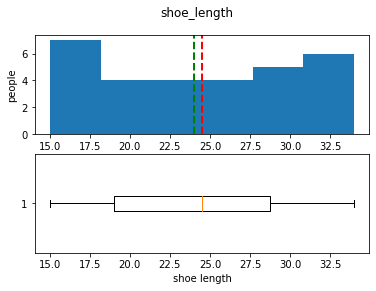

In [12]:
import graphing

graphing.histogram(dataset, label_x='shoe_length', nbins=10, include_boxplot=True)


The median value of the boxplot tells us that the majority of people in this dataset have a shoe length of under 25cm or so. We can also note an absence of outliers, meaning that none of the people in this dataset have exceptionally big or small feet. 

It can also be useful to plot the relation between the labels and features, to gain a more in-depth understanding of how they relate to each other.

In [16]:
graphing.scatter_2D(dataset, label_x="shoe_length", label_y="height", title='height as a function of shoe length')

We can see that there is a positive correlation between a person's shoe length and their height. Intuitively, this makes sense, as we would expect taller people to have larger feet.

## Simple linear regression
Let's further examine the relationship between our labels and features by fitting a line to the dataset. We will do this by fitting a simple linear regression model to the dataset.

In [25]:
X = array(dataset['shoe_length'])
y = array(dataset['height'])

#reshape arrays for 'LinearRegression'

X = X.reshape(-1,1)
y = y.reshape(-1,1)

model = LinearRegression().fit(X,y)

y_pred = model.predict(X)

def predict(x):
    return model.predict(x.reshape(-1,1)).flatten()

# Show a graph of the result
graphing.scatter_2D(dataset, 
                    label_x="shoe_length", 
                    label_y="height",
                    trendline=predict,
                    title='height as a function of shoe length')

The line seems to fit the data quite well, validating our hypothesis that there is a positive correlation between a person's shoe length and height.

## Summary
We covered the following concepts in this exercise:

- Quickly visualize a dataset.
- Build a Single Linear Regression Model.
